### Imports

For your convenience, we have included a few pre-written functions, which you might find useful in your analysis. They are by no means necessary, but feel free to use any or all of them. The code for these functions can be found in /src

In [68]:
import pandas as pd
import os
import sys
import missingno as msno
from pathlib import Path
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [23]:
 path = Path.cwd().parent.parent


In [3]:
# to allow for all variables to be displayed in jupyter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
def column_std(df):
    """
    Standardizes column names
    """
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(', ', '_')
    df.columns = df.columns.str.replace('-', '_')
    df.columns = df.columns.str.replace('/', '_')
    df.columns = df.columns.str.replace('(', '_')
    df.columns = df.columns.str.replace(')', '_')
    df.columns = df.columns.str.replace(' ', '_')
    print(df.columns)
    return df

### Data

'ACS Year-by-Year Munging.ipynb'       'NFIRS_Block_level-3 States.ipynb'
 ir_1_smoke_alarm_data_cleaning.ipynb   NFIRS_Block_level.ipynb
 ir_2_smoke_alarm_EDA.ipynb             NFIRS_Tract_level.ipynb
'Lives Saved Visualizations.ipynb'      rf_individualtree.png


In [27]:
input_loc =  path /'Data'/ 'Master Project Data'
output_loc = path /'Data'/ 'processed'

In [ ]:
/home/kelsonss/Documents/GitHub/rcp2/Data/Master Project Data/ARC Preparedness Data.csv
/home/kelsonss/Documents/GitHub/rcp2/data/Master Project Data/ARC Preparedness Data.csv

In [100]:
arc_path = input_loc / 'ARC Preparedness Data.csv'
arc = pd.read_csv(arc_path, 
                  dtype = {'GEOID': str, 'Zip': str})
arc.dropna(inplace = True)
arc.head()

,GEOID,Census Block Group Y,Census Block Group X,City,State,Zip,County,In-Home Visit Date,Smoke Alarms Installed (9-Volt/10-Year/DHH),10-Year and 9-Volt Alarms Installed,DHH Alarms Installed,Pre-Existing Alarms,Pre-Existing Alarms Tested and Working,Batteries Replaced,Fire Escape Plans Made,Fire Safety Checklists Completed,Additional Hazard Education Conducted,Additional Hazard Type,People Served,Youth Served,Seniors Served,"Veterans, Military Members and Military Family Members Served","Individuals with Disabilities, Access, or Functional Needs Served"
12,#_010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,0,0.0,0.0,0,1,1,0,None,2,0,0,0,0
18,#_010010208012,32.455173,-86.534591,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,0,0.0,0.0,0,1,1,1,Tornadoes,5,0,0,1,0
23,#_010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,1,0.0,0.0,0,1,1,1,Other,1,0,0,0,0
24,#_010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,0,0.0,0.0,0,1,1,1,Tornadoes,1,0,0,0,0
27,#_010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,0,0.0,0.0,0,1,1,0,None,1,0,0,0,0


## EDA  

- remove all houses that don't have a previous smoke detector record 
- Determine the median number of house visist
- Visualize visit distribution 
- use ACS data to determine % of blocks visited 
- determine % blocks visited with >15 visits 

In [101]:
#block level
counts = arc['GEOID'].value_counts()
counts_median = counts.median()
counts.describe()


count    87725.000000
mean         6.132619
std         15.250533
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       1863.000000
Name: GEOID, dtype: float64

## EDA- Geograpic Level
 repeat block Level analysis at various levels

In [102]:
# county
county_counts =  arc['GEOID'].str[:9].value_counts()
county_counts.describe()

count    3605.000000
mean      149.232732
std       331.121218
min         1.000000
25%        10.000000
50%        47.000000
75%       148.000000
max      6579.000000
Name: GEOID, dtype: float64

In [103]:
# state 
state_counts =  arc['GEOID'].str[:4].value_counts()
state_counts.describe()

count       52.000000
mean     10345.846154
std      12099.256714
min          3.000000
25%       2130.500000
50%       7135.500000
75%      12123.000000
max      51826.000000
Name: GEOID, dtype: float64

In [31]:
acs = pd.read_csv(input_loc / 'ACS 5YR Block Group Data.csv', encoding='latin-1')
acs

,GEOID,NAME,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10K,house_val_10K_15K,house_val_15K_20K,house_val_20K_25K,house_val_25K_30K,house_val_30K_35K,house_val_35K_40K,house_val_40K_50K,house_val_50K_60K,house_val_60K_70K,house_val_70K_80K,house_val_80K_90K,house_val_90K_100K,house_val_100K_125K,house_val_125K_150K,house_val_150K_175K,house_val_175K_200K,house_val_200K_250K,house_val_250K_300K,house_val_300K_400K,house_val_400K_500K,house_val_500K_750K,house_val_750K_1M,house_val_1M_1.5M,house_val_1.5M_2M,house_val_more_2M
0,#_530019501001,"Block Group 1, Census Tract 9501, Adams County...",Adams County,Washington,842,64,0.076010,28484.0,0.738717,0.494062,0.166271,556,0.010791,0.000000,0.000000,0.016187,0.026978,0.003597,0.012590,0.010791,0.294964,0.043165,0.131295,0.156475,0.196043,0.091727,0.005396,0.000000,641,0.628705,0.371295,0.956057,0.956057,0.043943,0.043943,0.029691,0.008314,0.005938,306,0.725490,0.689542,0.035948,0.000000,0.274510,0.254902,0.019608,319,0.959248,0.040752,0.774510,0.225490,0.000000,0.021944,0.000000,0.078370,0.109718,0.050157,0.194357,0.172414,0.373041,0.000000,0.072100,0.131661,0.018809,0.009404,0.040752,0.056426,0.068966,0.068966,0.532915,0.009804,0.000000,0.666667,0.261438,0.000000,0.016340,0.000000,0.045752,0.000000,1.000000,0.000000,0.949843,0.050157,0.350211,0.350211,0.000000,0.000000,0.0,0.649789,237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113924,0.000000,0.008439,0.042194,0.130802,0.000000,0.135021,0.109705,0.084388,0.177215,0.113924,0.000000,0.054852,0.000000,0.029536,0.000000,0.0
1,#_530019501002,"Block Group 2, Census Tract 9501, Adams County...",Adams County,Washington,922,94,0.101952,29939.0,0.737219,0.572597,0.228016,783,0.005109,0.005109,0.000000,0.000000,0.003831,0.007663,0.006386,0.026820,0.307791,0.126437,0.143040,0.117497,0.141762,0.076628,0.019157,0.012771,851,0.603995,0.396005,0.906953,0.882413,0.093047,0.117587,0.002045,0.000000,0.061350,467,0.520343,0.428266,0.042827,0.049251,0.479657,0.430407,0.049251,571,0.817863,0.182137,0.695931,0.304069,0.029772,0.021016,0.068301,0.089317,0.129597,0.222417,0.087566,0.120841,0.231173,0.000000,0.000000,0.012259,0.043783,0.063047,0.173380,0.066550,0.169877,0.087566,0.383538,0.680942,0.000000,0.282655,0.023555,0.000000,0.006424,0.000000,0.000000,0.006424,0.968476,0.031524,0.935201,0.064799,0.455385,0.393846,0.036923,0.0246

## Describing the Data

### Data Shape

<i>Needs an arc-acs one-to-many join</i>

In [32]:
arc.shape

(862057, 23)

In [33]:
acs.shape

(217739, 116)

### Type

*Missing values for the target variable*

In [34]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862057 entries, 0 to 862056
Data columns (total 23 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   GEOID                                                              862057 non-null  object 
 1   Census Block Group Y                                               862057 non-null  float64
 2   Census Block Group X                                               862057 non-null  float64
 3   City                                                               862057 non-null  object 
 4   State                                                              862057 non-null  object 
 5   Zip                                                                862057 non-null  object 
 6   County                                                             862057 non-null  object 
 7   In-Home Vis

In [35]:
# change to datetime
arc['In-Home Visit Date'] = pd.to_datetime(arc['In-Home Visit Date'])

## Cleaning

### Combine and/or Reshape

### Variable Names

### Duplicates
We assume duplicate rows are visits to multiple households in the data.

### Categorical Encoding

In [79]:
# will do in next book

### Missing Data

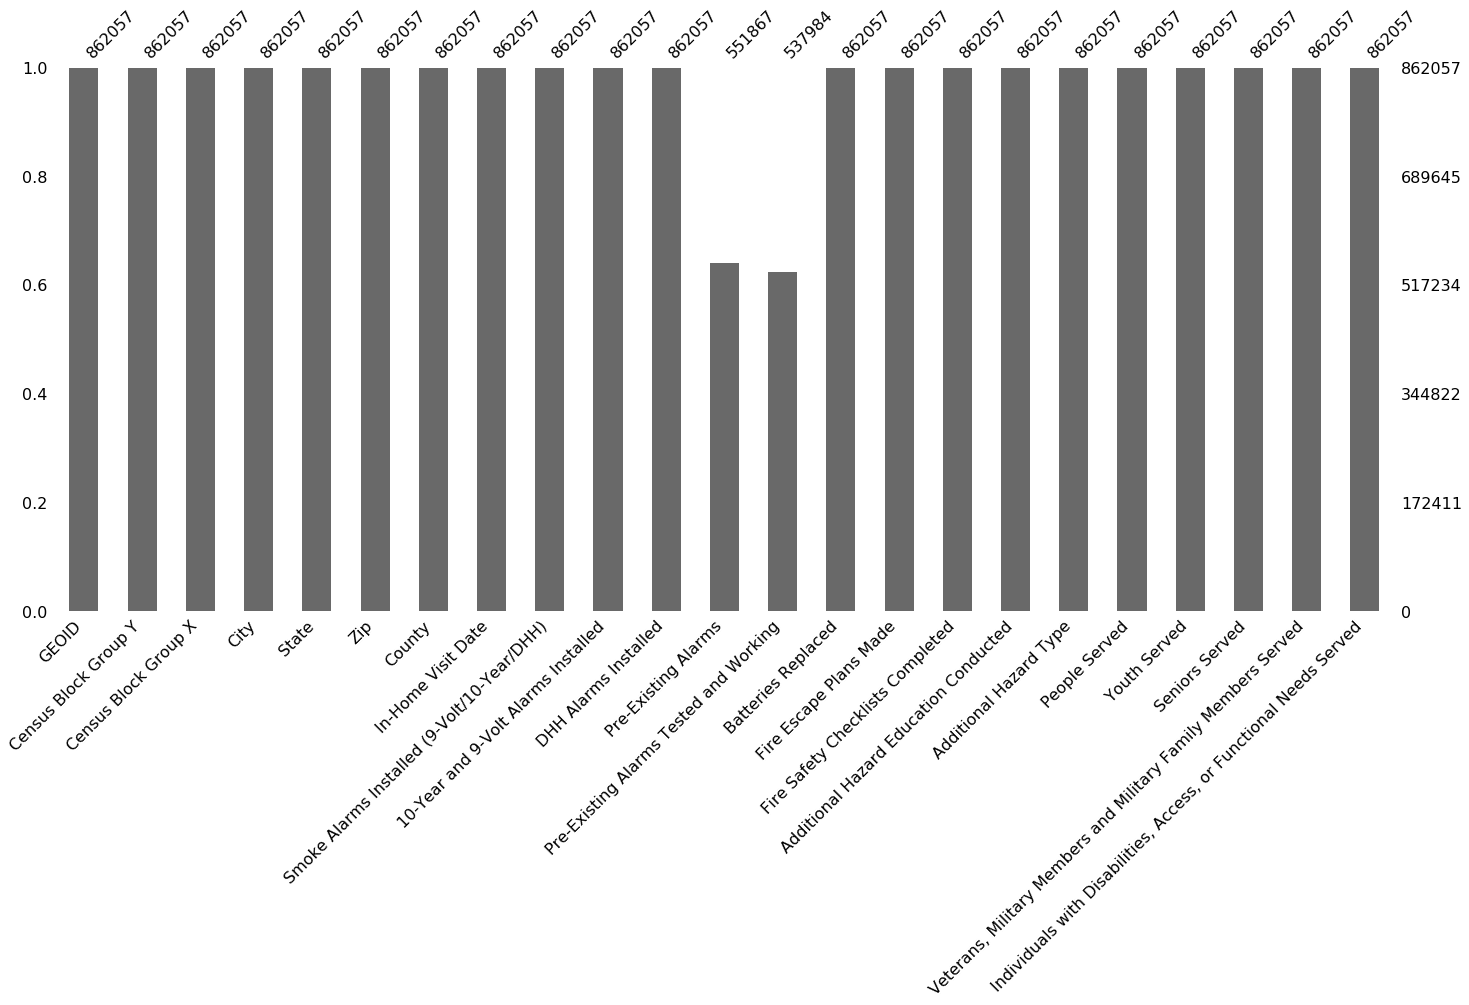

In [114]:
msno.bar(arc);

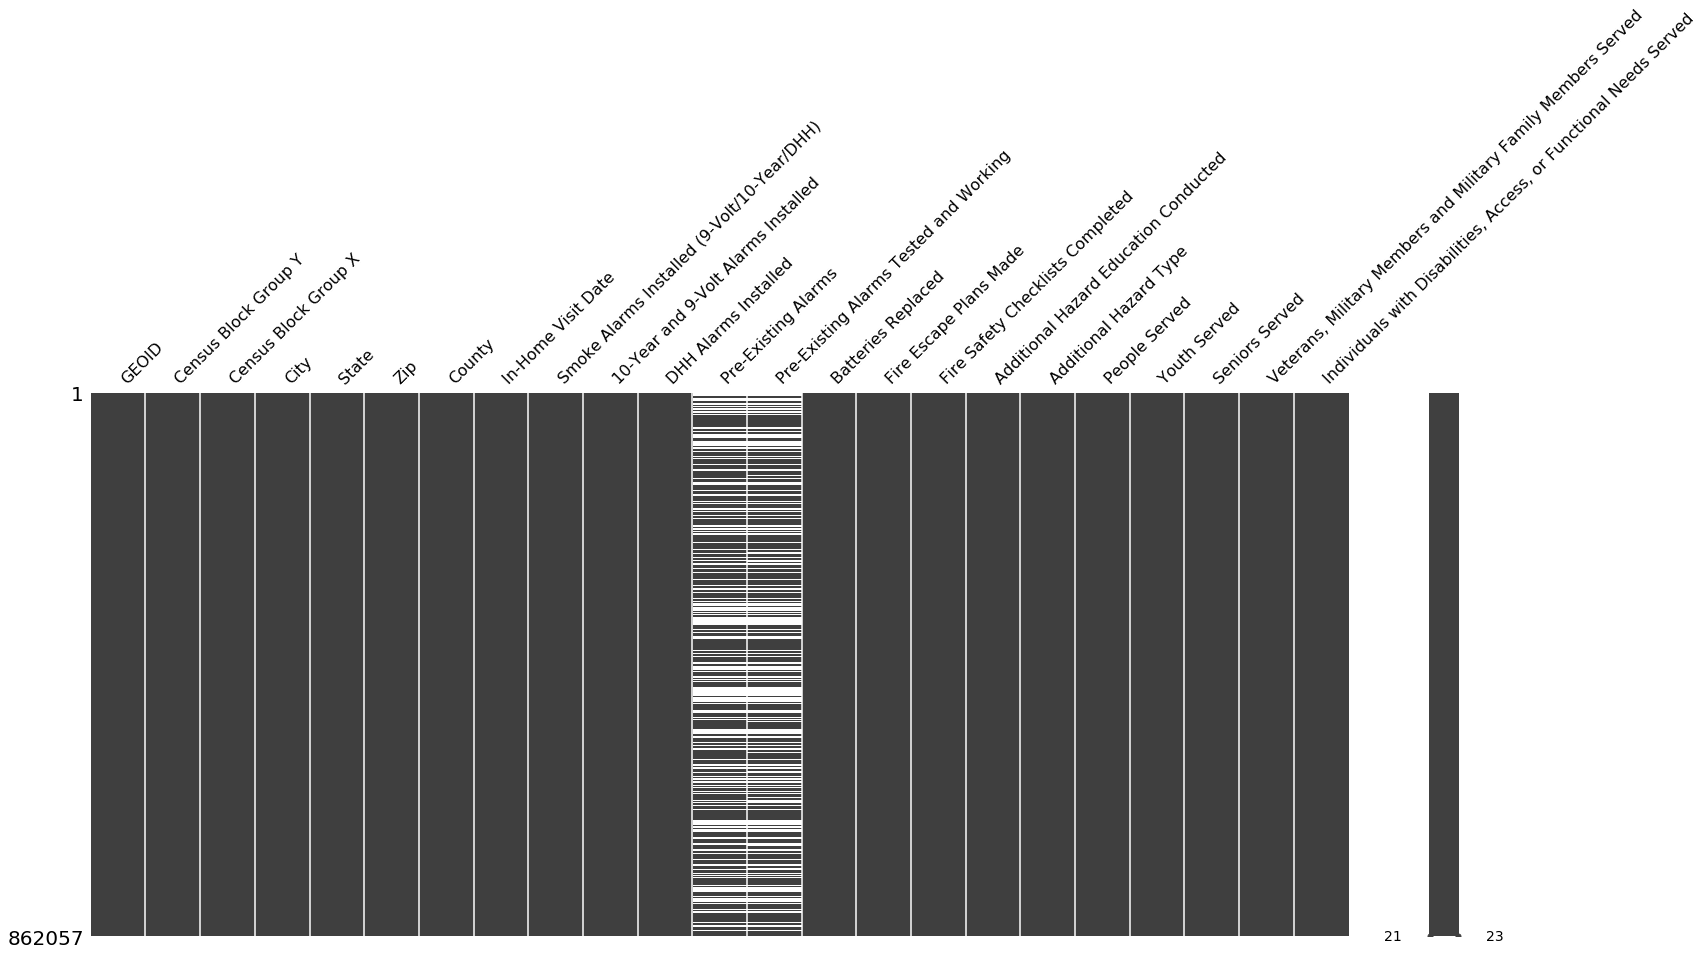

In [115]:
msno.matrix(arc);

In [82]:
df[df.pre_existing_alarms.isna()]

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,dhh_alarms_installed,pre_existing_alarms,pre_existing_alarms_tested_and_working,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served,name,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10k,house_val_10k_15k,house_val_15k_20k,house_val_20k_25k,house_val_25k_30k,house_val_30k_35k,house_val_35k_40k,house_val_40k_50k,house_val_50k_60k,house_val_60k_70k,house_val_70k_80k,house_val_80k_90k,house_val_90k_100k,house_val_100k_125k,house_val_125k_150k,house_val_150k_175k,house_val_175k_200k,house_val_200k_250k,house_val_250k_300k,house_val_300k_400k,house_val_400k_500k,house_val_500k_750k,house_val_750k_1m,house_val_1m_1.5m,house_val_1.5m_2m,house_val_more_2m,house_density_occ,house_density
0,#_010010201001,32.465832,-86.489661,PRATTVILLE,AL,36067,Autauga,2016-02-27,1,1,0,NaN,NaN,0,1,1,1,Tornadoes,2,0,0,0,0,"Block Group 1, Census Tract 201, Autauga Count...",Autauga County,Alabama,692,91,0.131503,24775.0,0.913295,0.541908,0.095376,441,0.000000,0.000000,0.034014,0.045351,0.052154,0.006803,0.056689,0.000000,0.272109,0.018141,0.111111,0.081633,0.183673,0.029478,0.065760,0.043084,555,0.578378,0.421622,0.933526,0.916185,0.066474,0.083815,0.000000,0.037572,0.017341,300,0.610000,0.343333,0.066667,0.200000,0.390000,0.323333,0.066667,300,1.000000,0.000000,0.653333,0.346667,0.000000,0.000000,0.000000,0.163333,0.213333,0.260000,0.120000,0.060000,0.183333,0.000000,0.000000,0.063333,0.166667,0.160000,0.093333,0.226667,0.036667,0.113333,0.140000,0.530000,0.093333,0.376667,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.00,0.00,1.000000,0.000000,0.352041,0.265306,0.086735,0.000000,0.0,0.647959,196,0.219388,0.000000,0.000000,0.0,0.000000,0.040816,0.0,0.035714,0.000000,0.000000,0.000000,0.214286,0.000000,0.020408,0.015306,0.112245,0.000000,0.107143,0.193878,0.040816,0.000000,0.000000,0.0,0.0,0.0,0.0,0.433526,0.433526
1,#_010010201002,32.485867,-86.489671,PRATTVILLE,AL,36067,Autauga,2015-01-16,1,1,0,NaN,NaN,0,1,0,0,None,1,0,0,0,0,"Block Group 2, Census Tract 201, Autauga 

In [119]:
msno.matrix(df);

MemoryError: Unable to allocate 3.65 GiB for an array with shape (862039, 142, 4) and data type float64

<Figure size 1800x720 with 2 Axes>

## Verifying the Data Quality

### Data Source and Reliability

*ARC = Possible hand-entry by surveyors and likely to have errors*


*ACS = Official entry by federal agency with two centuries of experience. Unlikely to have errors.*

### Error Handling

In [88]:
suspicious = []
for i in tqdm(range(df.shape[0])):
    suspicious.append(df.county[i] in df.county_name[i])
    if not i%5e4:
        print(f"{i} done")
len(suspicious)
# df[df.county_name != df.county].select_dtypes(include=[np.object])

0 done
50000 done
100000 done
150000 done
200000 done
250000 done
300000 done
350000 done
400000 done
450000 done
500000 done
550000 done
600000 done
650000 done
700000 done
750000 done
800000 done
850000 done



862054

In [89]:
df['unmatched_counties']=pd.Series(suspicious)

In [90]:
df[df.unmatched_counties == False].select_dtypes(include=[np.object])

,geoid,city,state,zip,county,additional_hazard_type,name,county_name,state_name
32,#_010010209004,DEATSVILLE,AL,36022,Elmore,Tornadoes,"Block Group 4, Census Tract 209, Autauga Count...",Autauga County,Alabama
37,#_010030101002,STOCKTON,AL,36529,Washington,Tornadoes,"Block Group 2, Census Tract 101, Baldwin Count...",Baldwin County,Alabama
244,#_010090503001,ALTOONA,AL,35952,Etowah,None,"Block Group 1, Census Tract 503, Blount County...",Blount County,Alabama
248,#_010090504001,HORTON,AL,35980,Marshall,Flooding,"Block Group 1, Census Tract 504, Blount County...",Blount County,Alabama
265,#_010090506011,WARRIOR,AL,35180,Jefferson,Tornadoes,"Block Group 1, Census Tract 506.01, Blount Cou...",Blount County,Alabama
...,...,...,...,...,...,...,...,...,...
859960,#_551390022021,FREMONT,WI,54940,Waupaca,Tornadoes,"Block Group 1, Census Tract 22.02, Winnebago C...",Winnebago County,Wisconsin
859961,#_551390022021,FREMONT,WI,54940,Waupaca,Tornadoes,"Block Group 1, Census Tract 22.02, Winnebago C...",Winnebago County,Wisconsin
859997,#_551390025001,APPLETON,WI,54915,Outagamie,Tornadoes,"Block Group 1, Census Tract 25, Winnebago Coun...",Winnebago County,Wisconsin
859998,#_551390025002,APPLETON,WI,54915,Outagamie,Tornadoes,"Block Group 2, Census Tract 25, Winnebago Coun...",Winnebago County,Wisconsin


In [91]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [92]:
states[df.state[2]]

'Alabama'

In [93]:
unmatched_state = []
for i in tqdm(range(df.shape[0])):
    unmatched_state.append(states[df.state[i]] == df.state_name[i])
    if not i%5e4:
        print(f"{i} done")
df['unmatched_state'] = pd.Series(unmatched_state)

0 done
50000 done
100000 done
150000 done
200000 done
250000 done
300000 done
350000 done
400000 done
450000 done
500000 done
550000 done
600000 done
650000 done
700000 done
750000 done
800000 done
850000 done



In [94]:
df[df.unmatched_state == False].select_dtypes(include=[np.object])

,geoid,city,state,zip,county,additional_hazard_type,name,county_name,state_name
270502,#_191315601002,ADAMS,MN,55909,Mower,None,"Block Group 2, Census Tract 5601, Mitchell Cou...",Mitchell County,Iowa
296192,#_210759601005,FULTON,TN,42041,Fulton,Other,"Block Group 5, Census Tract 9601, Fulton Count...",Fulton County,Kentucky
304683,#_211110075011,JEFFERSONVILLE,IN,47130,Clark,Tornadoes,"Block Group 1, Census Tract 75.01, Jefferson C...",Jefferson County,Kentucky
309305,#_211110117102,LOUISVILLE,IN,40229,Jefferson,Other,"Block Group 2, Census Tract 117.10, Jefferson ...",Jefferson County,Kentucky
462964,#_330079501003,LEMINGTON,VT,05903,Essex,Winter Weather,"Block Group 3, Census Tract 9501, Coos County,...",Coos County,New Hampshire
543991,#_360790101003,NEW FAIRFIELD,CT,06812,Fairfield,Winter Weather,"Block Group 3, Census Tract 101, Putnam County...",Putnam County,New York
631849,#_391059646001,RAVENSWOOD,WV,26164,Jackson,Winter Weather,"Block Group 1, Census Tract 9646, Meigs County...",Meigs County,Ohio
631850,#_391059646001,RAVENSWOOD,WV,26164,Jackson,Winter Weather,"Block Group 1, Census Tract 9646, Meigs County...",Meigs County,Ohio
751572,#_050930112002,HENNING,TN,38041,Lauderdale,None,"Block Group 2, Census Tract 112, Mississippi C...",Mississippi County,Arkansas
815806,#_511410302006,STUART,NC,24171,Patrick,None,"Block Group 6, Census Tract 302, Patrick Count...",Patrick County,Virginia


*drop these errors*

In [95]:
df = df.loc[df.unmatched_state]

In [96]:
slim = df.dropna().copy()

### Feature Engineering
- ideal process (two models):
    1. predict missing outcome variables based on visit information (first "micro" model)
    2. group actual and synthesized data by block and join to ACS data
    3. predict average portion of pre-existing smoke alarm per block (second "macro" model)
    
    
- quick process (single model):
    1. drop visits missing information on pre-existing smoke alarms
    2. group remaining visits by block and join to ACS data
    3. predict average likelihood of a pre-existing smoke alarm per block (model)
    

In [97]:
# generate binary target
slim['at_least_one_alarm'] = slim.pre_existing_alarms > 0

In [98]:
slim['at_least_one_alarm_working'] = slim.pre_existing_alarms_tested_and_working > 0

In [99]:
list(slim.columns)

['geoid',
 'census_block_group_y',
 'census_block_group_x',
 'city',
 'state',
 'zip',
 'county',
 'in_home_visit_date',
 'smoke_alarms_installed__9_volt_10_year_dhh_',
 '10_year_and_9_volt_alarms_installed',
 'dhh_alarms_installed',
 'pre_existing_alarms',
 'pre_existing_alarms_tested_and_working',
 'batteries_replaced',
 'fire_escape_plans_made',
 'fire_safety_checklists_completed',
 'additional_hazard_education_conducted',
 'additional_hazard_type',
 'people_served',
 'youth_served',
 'seniors_served',
 'veterans_military_members_and_military_family_members_served',
 'individuals_with_disabilities_access_or_functional_needs_served',
 'name',
 'county_name',
 'state_name',
 'tot_population',
 'in_poverty',
 'inc_pct_poverty',
 'inc_pcincome',
 'age_pct_under25',
 'age_pct_25_64',
 'age_pct_over65',
 'educ_tot_pop',
 'educ_no_school',
 'educ_nursery_4th',
 'educ_5th_6th',
 'educ_7th_8th',
 'educ_9th',
 'educ_10th',
 'educ_11th',
 'educ_12th_no_diploma',
 'educ_high_school_grad',
 'edu

In [100]:
slim.drop(columns=['unmatched_state',  'state', 'zip','county',  'name',
 'county_name',
 'state_name', 'smoke_alarms_installed__9_volt_10_year_dhh_',
 '10_year_and_9_volt_alarms_installed',
 'dhh_alarms_installed','batteries_replaced',
 'fire_escape_plans_made',
 'fire_safety_checklists_completed',
 'additional_hazard_education_conducted',
 'additional_hazard_type', 'unmatched_counties',
 'unmatched_state'])

,geoid,census_block_group_y,census_block_group_x,city,in_home_visit_date,pre_existing_alarms,pre_existing_alarms_tested_and_working,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10k,house_val_10k_15k,house_val_15k_20k,house_val_20k_25k,house_val_25k_30k,house_val_30k_35k,house_val_35k_40k,house_val_40k_50k,house_val_50k_60k,house_val_60k_70k,house_val_70k_80k,house_val_80k_90k,house_val_90k_100k,house_val_100k_125k,house_val_125k_150k,house_val_150k_175k,house_val_175k_200k,house_val_200k_250k,house_val_250k_300k,house_val_300k_400k,house_val_400k_500k,house_val_500k_750k,house_val_750k_1m,house_val_1m_1.5m,house_val_1.5m_2m,house_val_more_2m,house_density_occ,house_density,at_least_one_alarm,at_least_one_alarm_working
12,#_010010205002,32.470418,-86.424166,PRATTVILLE,2016-09-09,0.0,0.0,2,0,0,0,0,5952,666,0.111895,41858.0,0.839478,0.532790,0.158891,4240,0.010142,0.001415,0.000000,0.004717,0.021462,0.008726,0.001415,0.017453,0.197170,0.062028,0.166274,0.070991,0.212972,0.170519,0.034198,0.020519,4747,0.666105,0.333895,0.760196,0.750571,0.239804,0.249429,0.000000,0.172757,0.009625,2708,0.620015,0.537297,0.019202,0.063516,0.379985,0.319055,0.060931,2858,0.947516,0.052484,0.430207,0.569793,0.000000,0.060882,0.100070,0.132260,0.278167,0.170049,0.127712,0.027642,0.103219,0.00000,0.061232,0.663401,0.241428,0.033940,0.000000,0.000000,0.000000,0.000000,0.000000,0.411743,0.026957,0.561300,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.939118,0.060882,0.790558,0.693562,0.096996,0.000000,0.0,0.209442,1165,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001717,0.158798,0.170815,0.094421,0.424893,0.059227,0.074678,0.000000,0.015451,0.0,0.000000,0.0,0.0,0.454973,0.480175,False,False
18,#_010010208012,32.455173,-86.534591,PRATTVILLE,2019-09-30,0.0,0.0,5,0,0,1,0,2002,152,0.075924,38304.0,0.793207,0.551948,0.159341,1424,0.009129,0.000000,0.000000,0.006320,0.004213,0.004213,0.000000,0.000000,0.217697,0.075843,0.117275,0.129213,0.254213,0.130618,0.037921,0.013343,1569,0.643722,0.356278,0.895604,0.884615,0.104396,0.115385,0.021479,0.069930,0.010989,728,0.853022,0.695055,0.056319,0.101648,0.146978,0.129121,0.017857,826,0.881356,0.118644,0.861264,0.138736,0.03026

#### Creation of macro-dataframe

In [101]:
no_of_visits = slim.groupby(['geoid']).in_home_visit_date.count()
no_of_visits

geoid
#_010010205002    1
#_010010208012    1
#_010010208021    2
#_010010208023    2
#_010010209003    3
                 ..
#_560430003021    1
#_560430003022    1
#_560459513001    3
#_560459513002    3
#_560459513003    6
Name: in_home_visit_date, Length: 87109, dtype: int64

In [102]:
macro = pd.merge(acs, slim.groupby(['geoid']).at_least_one_alarm.sum(), on='geoid', how='inner')

In [103]:
macro = pd.merge(macro, no_of_visits, on='geoid', how='inner')

In [104]:
macro = macro.rename(columns={"in_home_visit_date": "visits"})

In [105]:
macro['occ_house_visited'] = macro.visits/macro.house_tot_occ_cnt

In [106]:
macro['visits_one_plus_alarms'] = macro.at_least_one_alarm/macro.visits

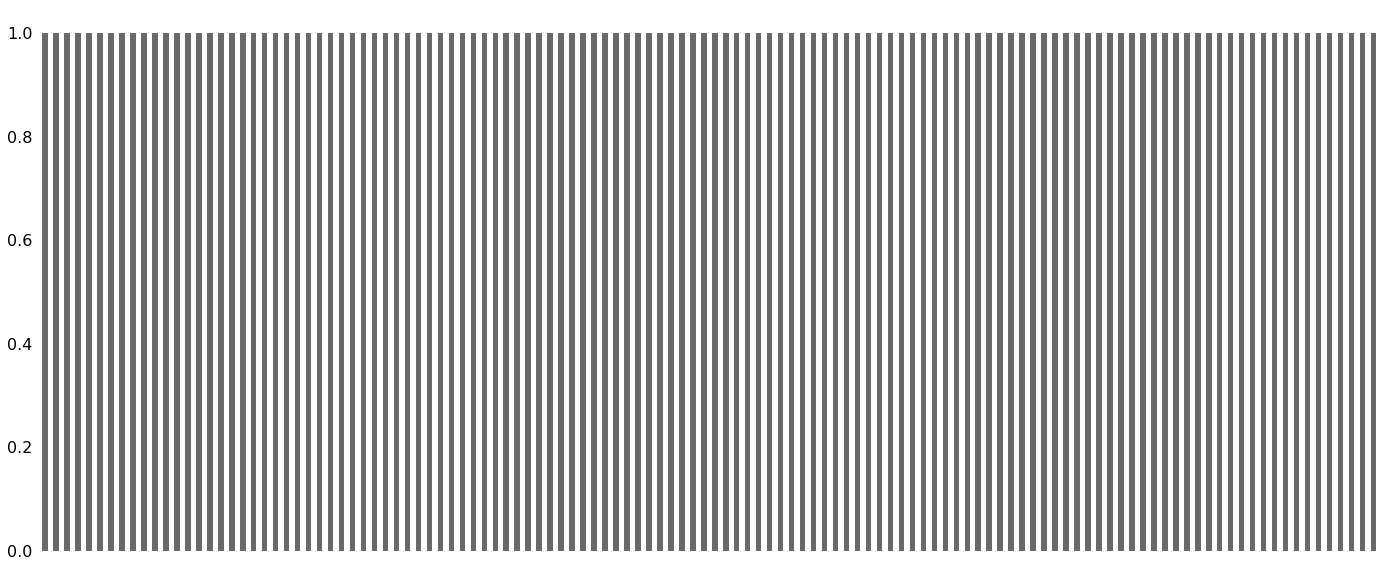

In [107]:
msno.bar(macro);

####  Save the Analytic Set
After this step, you should have a single dataframe with any inconsistencies, such as non-uniform column names and missing data, fixed. Depending on the data, the dataframe could be multiindexed as well. This is a good time to save the set. We'll load it from here during the next notebook.

Be sure to give your analytic set a unique name, as other people will be using the same repository to store their data on git. To adhere to the git repo naming conventions, prepend your initials to the filename.

In [108]:
df.to_pickle(output_loc + "all_missing_included.pkl")

In [109]:
slim.to_pickle(output_loc + "all_missing_excluded.pkl")

In [113]:
macro.to_pickle(output_loc + "macro_engineered.pkl")

## Outcome 

By the end of this notebook you should have an analytic data set and be ready to dive into some analysis.